In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pavement-dataset/ESC 12 Pavement Dataset.csv


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('/kaggle/input/pavement-dataset/ESC 12 Pavement Dataset.csv')
df.head()

,Segment ID,PCI,Road Type,AADT,Asphalt Type,Last Maintenance,Average Rainfall,Rutting,IRI,Needs Maintenance
0,SID 155440,70.00,Secondary,4634,Concrete,2022,42.07,15.11,0.68,0
1,SID 244365,37.87,Tertiary,3474,Asphalt,2017,79.60,19.67,0.99,1
2,SID 137867,88.32,Tertiary,1734,Concrete,2019,62.69,14.73,0.50,0
3,SID 540519,52.30,Tertiary,3119,Asphalt,2008,79.32,17.01,1.04,1
4,SID 745776,49.10,Tertiary,3505,Asphalt,2019,71.81,21.08,1.18,1


In [4]:
df.columns

Index(['Segment ID', 'PCI', 'Road Type', 'AADT', 'Asphalt Type',
       'Last Maintenance', 'Average Rainfall', 'Rutting', 'IRI',
       'Needs Maintenance'],
      dtype='object')

In [5]:
# Check shape and column types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050000 entries, 0 to 1049999
Data columns (total 10 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Segment ID         1050000 non-null  object 
 1   PCI                1050000 non-null  float64
 2   Road Type          1050000 non-null  object 
 3   AADT               1050000 non-null  int64  
 4   Asphalt Type       1050000 non-null  object 
 5   Last Maintenance   1050000 non-null  int64  
 6   Average Rainfall   1050000 non-null  float64
 7   Rutting            1050000 non-null  float64
 8   IRI                1050000 non-null  float64
 9   Needs Maintenance  1050000 non-null  int64  
dtypes: float64(4), int64(3), object(3)
memory usage: 80.1+ MB


In [6]:
# Summary statistics
df.describe(include='all')

,Segment ID,PCI,Road Type,AADT,Asphalt Type,Last Maintenance,Average Rainfall,Rutting,IRI,Needs Maintenance
count,1050000,1.050000e+06,1050000,1.050000e+06,1050000,1.050000e+06,1.050000e+06,1.050000e+06,1.050000e+06,1.050000e+06
unique,1050000,NaN,3,NaN,2,NaN,NaN,NaN,NaN,NaN
top,SID 155440,NaN,Tertiary,NaN,Concrete,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,489465,NaN,525294,NaN,NaN,NaN,NaN,NaN
mean,NaN,5.470744e+01,NaN,1.155683e+04,NaN,2.018147e+03,6.498192e+01,1.659194e+01,8.500802e-01,4.998752e-01
std,NaN,2.877674e+01,NaN,1.389092e+04,NaN,4.984028e+00,1.802855e+01,2.891353e+00,2.366776e-01,5.000002e-01
min,NaN,0.000000e+00,NaN,-1.931300e+04,NaN,1.959000e+03,0.000000e+00,7.220000e+00,-2.800000e-01,0.000000e+00
25%,NaN,2.998000e+01,NaN,2.288000e+03,NaN,2.017000e+03,4.996000e+01,1.400000e+01,6.900000e-01,0.000000e+00
50%,NaN,5.502000e+01,NaN,5.307000e+03,NaN,2.019000e+03,6.497000e+01,1.703000e+01,8.500000e-01,0.000000e+00
75%,NaN,8.007000e+01,NaN,1.644100e+04,NaN,2.021000e+03,8.003000e+01,1.920000e+01,1.010000e+00,1.000000e+00


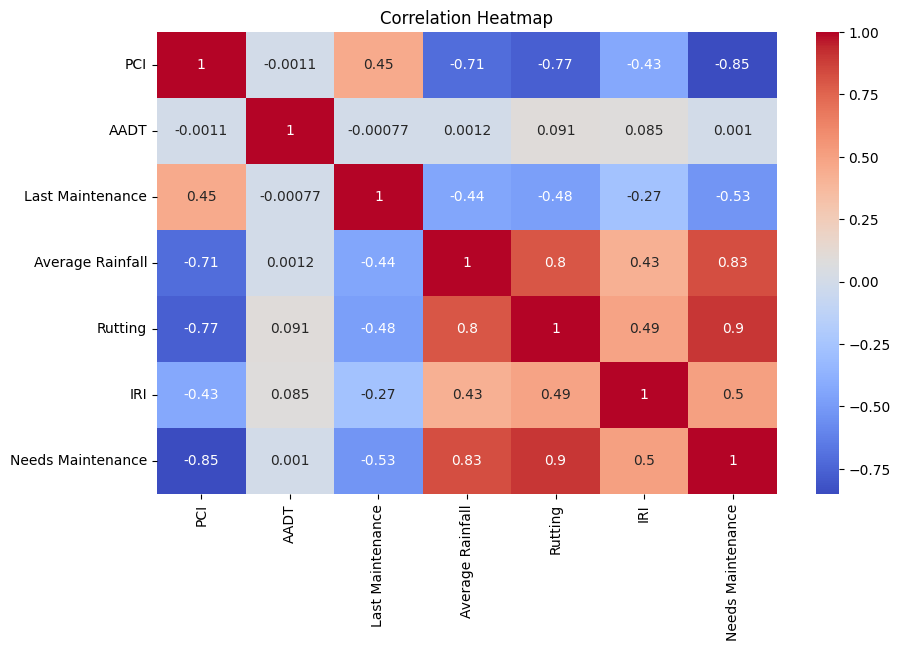

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap for correlations
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

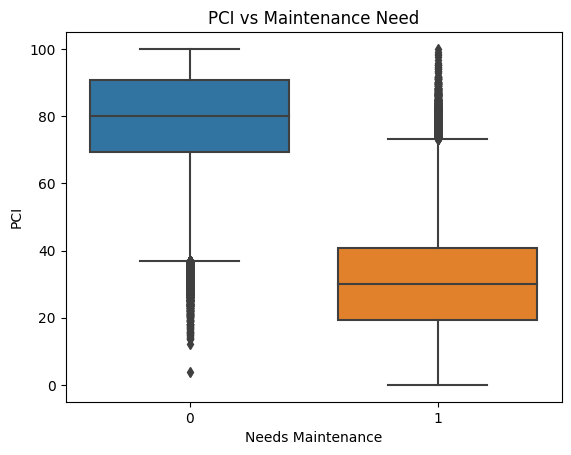

In [8]:
# Boxplot of PCI by Maintenance Need
sns.boxplot(data=df, x='Needs Maintenance', y='PCI')
plt.title("PCI vs Maintenance Need")
plt.show()

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode categorical columns
df = df.copy()
le = LabelEncoder()
for col in ['Road Type', 'Asphalt Type', 'Last Maintenance', 'Needs Maintenance']:
    df[col] = le.fit_transform(df[col])

# Drop ID column
df.drop('Segment ID', axis=1, inplace=True)

In [10]:
# Split features and label
X = df.drop('Needs Maintenance', axis=1)
y = df['Needs Maintenance']

In [11]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Train Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [13]:
# Predict
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9999904761904762
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    104739
           1       1.00      1.00      1.00    105261

    accuracy                           1.00    210000
   macro avg       1.00      1.00      1.00    210000
weighted avg       1.00      1.00      1.00    210000



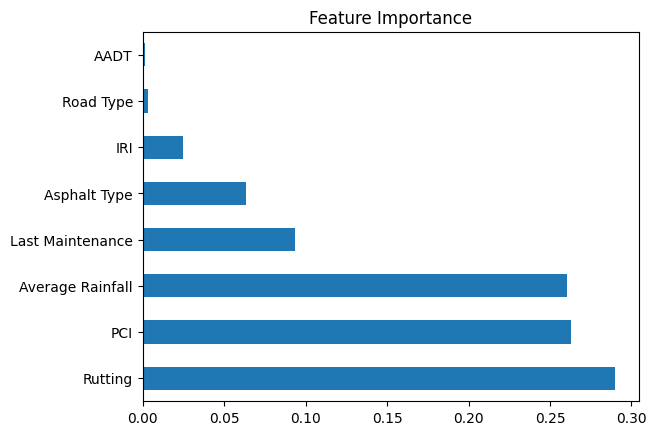

In [14]:
# Feature Importance Plot
feat_importance = pd.Series(model.feature_importances_, index=X.columns)
feat_importance.nlargest(8).plot(kind='barh')
plt.title("Feature Importance")
plt.show()

In [15]:
# Show some predictions
pred_df = X_test.copy()
pred_df['Actual'] = y_test
pred_df['Predicted'] = y_pred
pred_df.head()

,PCI,Road Type,AADT,Asphalt Type,Last Maintenance,Average Rainfall,Rutting,IRI,Actual,Predicted
690153,87.09,1,4424,1,55,50.26,14.78,0.86,0,0
1022027,32.71,1,19283,0,52,79.99,19.24,0.92,1,1
1044895,27.42,2,3442,1,42,75.16,19.69,0.79,1,1
55527,53.42,2,1697,1,58,54.76,12.94,0.73,0,0
401380,78.49,2,1906,1,54,51.42,13.74,1.13,0,0
